In [17]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Assuming the model and data processing pipeline is the same
data = pd.read_csv('Churn_Modelling.csv')
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
onehot_encoder_geo = OneHotEncoder(handle_unknown='ignore')
geo_encoded = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()

geo_encoded_df = pd.DataFrame(geo_encoded, columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)

# Scaling
scaler = StandardScaler()
X = data.drop('EstimatedSalary', axis=1)
X_scaled = scaler.fit_transform(X)

# Save the encoders and scaler
with open('label_encoder_gender.pkl', 'wb') as f:
    pickle.dump(label_encoder_gender, f)
with open('onehot_encoder_geo.pkl', 'wb') as f:
    pickle.dump(onehot_encoder_geo, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is already preprocessed and scaled, and you're predicting 'EstimatedSalary' or some other column
X = data.drop('EstimatedSalary', axis=1)  # or your target variable
y = data['EstimatedSalary']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ANN Regression Problem Statement

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# BUild the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) #Output layer for regression
])

## Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

model.summary()

c:\Users\paman\Desktop\VSCODE\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 81148.1172 - mae: 81148.1172 - val_loss: 69209.9922 - val_mae: 69209.9922
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69183.6797 - mae: 69183.6797 - val_loss: 67514.8125 - val_mae: 67514.8125
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67616.3984 - mae: 67616.3984 - val_loss: 63510.0039 - val_mae: 63510.0039
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 60976.5703 - mae: 60976.5703 - val_loss: 57460.0898 - val_mae: 57460.0898
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56180.0781 - mae: 56180.0781 - val_loss: 52776.7812 - val_mae: 52776.7812
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52284.0000 - mae: 52284.0000 - val_loss: 51651.1719 - val_mae: 51651.1719
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51420.9453 - mae: 51420.9453 - val_loss: 50969.9102 - val_mae: 50969.9102
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51

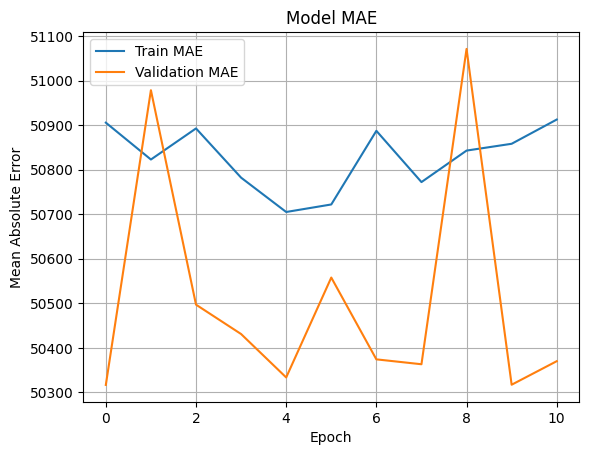

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50928.9023 - mae: 50928.9023
Test MAE: 50316.80


In [33]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

# Set up Tensorboard
log_dir ="regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [34]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',         # You can also use 'val_mae' if you're tracking MAE
    patience=10,                # Stops after 10 epochs without improvement
    restore_best_weights=True  # Restores weights from the best epoch
)


In [26]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks=[early_stopping_callback, tensorboard_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 51484.6172 - mae: 51484.6172 - val_loss: 50316.8047 - val_mae: 50316.8047
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 50416.5820 - mae: 50416.5820 - val_loss: 50978.3633 - val_mae: 50978.3633
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 51224.7266 - mae: 51224.7266 - val_loss: 50496.9883 - val_mae: 50496.9883
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 51049.6875 - mae: 51049.6875 - val_loss: 50431.0234 - val_mae: 50431.0234
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 50629.7852 - mae: 50629.7852 - val_loss: 50333.5938 - val_mae: 50333.5938
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50591.6953 - mae: 50591.6953 - val_loss: 50557.8281 - val_mae: 50557.8281
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50688.0703 - mae: 50688.0703 - val_loss: 50374.1836 - val_mae: 50374.1836
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

In [35]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
%tensorboard --logdir regressionlogs/fit

Reusing TensorBoard on port 6006 (pid 1648), started 0:46:31 ago. (Use '!kill 1648' to kill it.)

In [29]:
## Evaluate model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50928.9023 - mae: 50928.9023
Test MAE: 50316.8046875


In [30]:
model.save('regression_model.h5')